In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os

%matplotlib inline
from sklearn.utils import shuffle
import cv2
import tensorflow as tf
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers

from keras.models import Sequential,Model
from keras.layers import Dense, Conv2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint

from keras.layers import Flatten

In [2]:
#Numero di classi
NUM_CLASSES = 100


IMAGE_RESIZE = 224

DENSE_LAYER_ACTIVATION = 'sigmoid'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'

LOSS_METRICS = ['accuracy']

NUM_EPOCHS = 30

BATCH_SIZE_TRAINING = 10
BATCH_SIZE_VALIDATION = 10

BATCH_SIZE_TESTING = 1

BATCH_SIZE= 10

# Costruisco il modello EfficientNetB0
EfficientNetB0 è una rete neurale convoluzionale addestrata su più di un milione di immagini contenute nel più noto database che prende il nome di Imagenet. La rete perciò è pronta a classificare immagini di 1000 classi diverse, come ad esempio, penne, libri, computer ecc.

Quello che faremo in questo notebook è addestrare prima la rete senza alcuna applicazione di transfer learning, per poi mostrare le differenze in termini di accuracy con lo stesso modello su cui è stata applicato T.L.

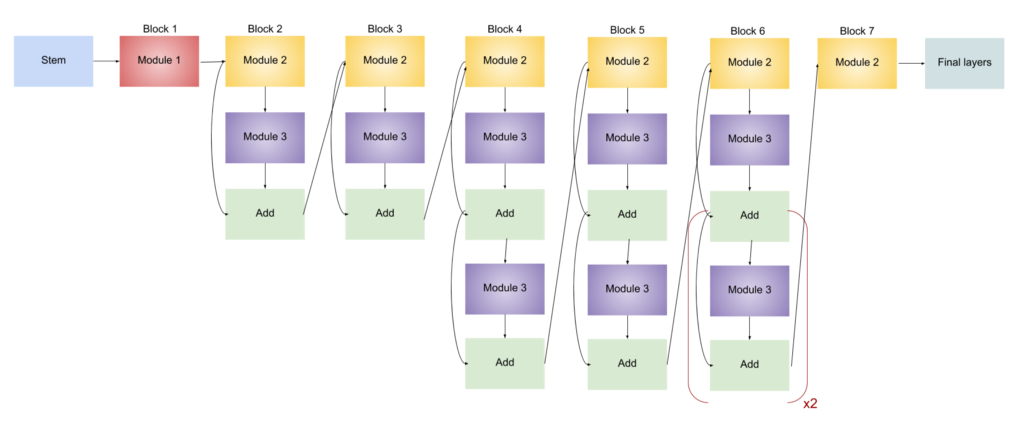

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Importiamo le immagini del train e validation dal Drive di Google.

In [5]:
from keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator()

image_size = IMAGE_RESIZE

train_set = data_generator.flow_from_directory(
        '/content/gdrive/MyDrive/LandMarkDataset1/train/',
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE_TRAINING,
        class_mode='categorical'
        )

valid_set = data_generator.flow_from_directory(
        '/content/gdrive/MyDrive/LandMarkDataset1/val/',
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE_VALIDATION,
        class_mode='categorical'
        ) 

Found 11412 images belonging to 100 classes.
Found 1385 images belonging to 100 classes.


In [8]:
train='/content/gdrive/MyDrive/LandMarkDataset1/train/'
valid='/content/gdrive/MyDrive/LandMarkDataset1/val/'


In [9]:
step_size_train=train_set.n//train_set.batch_size
step_size_train

1141

In [10]:
step_size_valid=valid_set.n//valid_set.batch_size
step_size_valid

138

In [11]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetB0

model= EfficientNetB0(input_shape=(224, 224, 3),
                      weights='imagenet',include_top=False,drop_connect_rate=0.7)


x= model.output
x = Flatten()(x)
x= Dense(units=100, activation='softmax')(x)
model= Model(inputs=model.input, outputs=x)




16711680/16705208 [==============================] - 0s 0us/step


In [12]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [13]:
#optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
#sgd = tf.keras.optimizers.SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)
    
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

In [14]:
model.summary()



Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
______________________________________________________________________________________________

In [15]:
len(model.layers)

239

In [16]:
model.fit(x=train_set, steps_per_epoch=step_size_train, validation_data= valid_set, validation_steps=step_size_valid, epochs=30, verbose=2)

Epoch 1/30
1141/1141 - 4752s - loss: 3.2376 - accuracy: 0.7043 - val_loss: 2.1104 - val_accuracy: 0.8775
Epoch 2/30
1141/1141 - 276s - loss: 1.4725 - accuracy: 0.8841 - val_loss: 2.5732 - val_accuracy: 0.8986
Epoch 3/30
1141/1141 - 270s - loss: 1.3053 - accuracy: 0.9119 - val_loss: 2.3006 - val_accuracy: 0.8978
Epoch 4/30
1141/1141 - 275s - loss: 1.2157 - accuracy: 0.9278 - val_loss: 2.6527 - val_accuracy: 0.9065
Epoch 5/30
1141/1141 - 273s - loss: 0.9968 - accuracy: 0.9449 - val_loss: 2.9578 - val_accuracy: 0.9058
Epoch 6/30
1141/1141 - 273s - loss: 0.9249 - accuracy: 0.9520 - val_loss: 3.0601 - val_accuracy: 0.9123
Epoch 7/30
1141/1141 - 272s - loss: 0.7825 - accuracy: 0.9582 - val_loss: 3.4560 - val_accuracy: 0.9101
Epoch 8/30
1141/1141 - 270s - loss: 0.8155 - accuracy: 0.9618 - val_loss: 4.1140 - val_accuracy: 0.9022
Epoch 9/30
1141/1141 - 270s - loss: 0.8146 - accuracy: 0.9614 - val_loss: 3.5913 - val_accuracy: 0.9159
Epoch 10/30
1141/1141 - 271s - loss: 0.6156 - accuracy: 0.9711 

In [17]:
test_set = data_generator.flow_from_directory(
    directory = '/content/gdrive/MyDrive/LandMarkDataset/test/',
    target_size = (image_size, image_size),
    batch_size = BATCH_SIZE_TESTING,
    class_mode = None,
    shuffle = False,
    seed = 123
)

Found 1519 images belonging to 100 classes.


In [21]:
pred = model.predict_generator(test_set, steps = len(test_set), verbose = 1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


1519/1519 [==============================] - 562s 369ms/step


In [23]:
predicted_classes = np.argmax(pred, axis=1)
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())


In [24]:
from sklearn.metrics import classification_report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)  

              precision    recall  f1-score   support

       10018       1.00      0.91      0.95        11
       10094       0.84      1.00      0.91        16
       10602       1.00      0.93      0.97        15
       11300       0.80      1.00      0.89        16
       11378       0.93      0.88      0.90        16
       11491       0.86      0.86      0.86        14
       11499       0.76      1.00      0.86        16
       11513       0.86      0.92      0.89        13
        1168       0.82      0.88      0.85        16
       11716       0.86      1.00      0.92        12
       11719       1.00      0.88      0.94        17
       11750       1.00      0.88      0.94        17
       11849       0.93      0.93      0.93        15
       11967       1.00      1.00      1.00        15
       12181       1.00      0.79      0.88        14
       12204       0.89      1.00      0.94        17
       12360       0.82      0.88      0.85        16
       12481       0.94    